## Importing

In [70]:
import pandas as pd
import plotly.express as px
import kaleido
import pytrends
from pytrends.request import TrendReq
import matplotlib.pyplot as plt
import pickle
import time


In [ ]:
def plot_timeseries(policy):
    fig = px.line(df[["date", f"{policy}"]], 
                x="date", 
                y=f"{policy}", 
                title=f'Popularity of \'{policy}\' in Google Search Singapore',
                labels={"date":"Date", f"{policy}":"Search popularity"})
    fig.show()
    fig.write_image(f"timeseries/{policy}_timeseries.png", scale=2)

def plot_rising_topics(policy):
    pytrends.build_payload([policy], geo='SG', timeframe='2020-01-01 2021-03-22', cat=0)
    related_topics = pytrends.related_topics()
    fig = px.bar(related_topics[f'{policy}']['rising'],
                title=f"Rising topics related to '{policy}' in Singapore ",
                x='topic_title',y='value',
                log=True,
                labels=dict(topic_title="Topic Title", value="Value"))
    fig.show()
    fig.write_image(f"rising_topics/{policy}_rising_topics.png", scale=2)

# def plot_top_topics(policy):
#     fig = px.bar(related_topics['covid-19']['rising'],
#                 title="Rising topics related to COVID-19 search in Singapore from 2020-01-01 to 2021-03-22",
#                 x='topic_title',y='value',
#                 labels=dict(topic_title="Topic Title", value="Value"))
#     fig.show()


## Defining search terms & building payload

In [71]:
#policy_list = ["covid-19", "vaccination", "tracetogether", "safeentry", "foreign workers", "social distancing", "circuit breaker", "budget", "mask", "stay home notice"]
policy_list = ["covid-19", "vaccination"]
pytrends = TrendReq(hl='en-US', tz=-480)     
pytrends.build_payload(policy_list, geo='SG', timeframe='2020-01-01 2021-03-22', cat=0)

## Calling pytrends: Interest over time

In [63]:
# Run once
df = pytrends.interest_over_time()

In [4]:
df.to_csv('data/interest_over_time.csv')
df = pd.read_csv('data/interest_over_time.csv')
df.tail()

,date,covid-19,vaccination,isPartial
58,2021-02-14,17,16,False
59,2021-02-21,18,25,False
60,2021-02-28,23,26,False
61,2021-03-07,17,36,False
62,2021-03-14,16,30,True


## Plotting Timeseries

In [5]:
for keyword in keywords:
    plot_timeseries(keyword)


## Calling Pytrends: Related topics

In [62]:
# # save if needed
# pickle.dump(related_topics, open("data/related_topics.p", "wb"))
# related_topics = pickle.load(open("related_topics.p", "rb"))

In [72]:
for policy in policy_list:
    plot_rising_topics(policy)
    time.sleep(3)

## Plotting Rising Topics bar graph

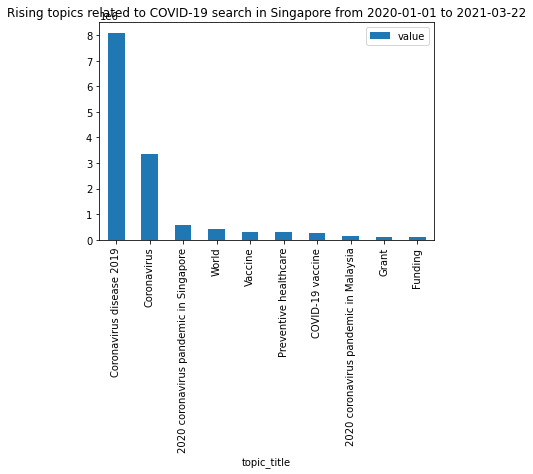

In [26]:
# using matplotlib

related_topics['covid-19']['rising'].plot.bar(x="topic_title", y="value", log=False, title="Rising topics related to COVID-19 search in Singapore from 2020-01-01 to 2021-03-22")

plt.show(block=True)

In [27]:
fig = px.bar(related_topics['covid-19']['rising'],
            title="Rising topics related to COVID-19 search in Singapore from 2020-01-01 to 2021-03-22",
            x='topic_title',y='value',
            labels=dict(topic_title="Topic Title", value="Value"))
fig.show()

## Plotting Top Topics bar graph

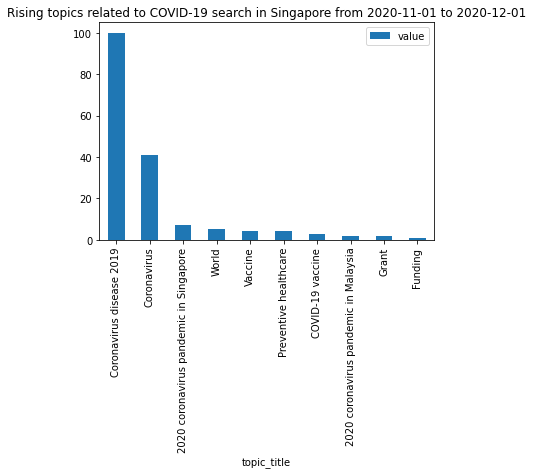

In [28]:
related_topics['covid-19']['top'].plot.bar(x="topic_title", y="value", log=False, title="Rising topics related to COVID-19 search in Singapore from 2020-11-01 to 2020-12-01")

plt.show(block=True)